In [22]:
#headers and csv:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib.lines import Line2D
df=pd.read_csv("/content/PAGED-CEE-with-party-codes-Dec-2023 (1).csv")
print(df.head())

   country_id  country_id_iso country_name  cab_id  cab_name     date_in  \
0          18             100     Bulgaria    1801   Lukanov  1990-09-22   
1          18             100     Bulgaria    1802     Popov  1990-12-20   
2          18             100     Bulgaria    1803  Dimitrov  1991-11-08   
3          18             100     Bulgaria    1804     Berov  1992-12-30   
4          18             100     Bulgaria    1805  Indzhova  1994-10-17   

  year_month_in  year_in    date_out year_month_out  ...  upper_seats_party16  \
0        1990m9     1990  1990-11-29        1990m11  ...                  NaN   
1       1990m12     1990  1991-10-13        1991m10  ...                  NaN   
2       1991m11     1991  1992-10-28        1992m10  ...                  NaN   
3       1992m12     1992  1994-09-08         1994m9  ...                  NaN   
4       1994m10     1994  1994-12-18        1994m12  ...                  NaN   

  upper_seats_party17 upper_seats_party18  upper_seats_p

Addressing important questions regarding the country's collition governments

In [9]:
def country_analysis(country_name, df):
  country_data=df[df['country_name']==country_name]
  if country_data.empty:
    print(f"No data found for {country_name}")
    return

  print(f"Cabinet names for {country_name}:")
  for cab_name in country_data['cab_name']:
    print(cab_name)


  unique_parties = set()
  for composition in df[df['country_name'] == country_name]['cab_composition1'].dropna():
    parties = [party.strip() for party in composition.split(',')]
    unique_parties.update(parties)

  num_unique_parties = len(unique_parties)

  print(f"All the parties existing in {country_name}:")
  print(', '.join(sorted(unique_parties)))

  print(f"\nNumber of parties existing in {country_name}:")
  print(num_unique_parties)

  form_decade_counts = country_data['form_decade'].value_counts()
  decade_mapping = {90: '1990s', 100: '2000s', 110: '2010s', 120: '2020s'}
  most_common_decade = form_decade_counts.idxmax()
  most_common_decade_count = form_decade_counts.max()

  print(f"The most common decade for cabinet formations in {country_name}: {decade_mapping.get(most_common_decade, 'Unknown')}")
  print(f"Number of cabinets formed in that decade: {most_common_decade_count}")

  govtypecount=country_data['govtype'].value_counts()
  govtype_mapping={1: 'Min',2: 'Maj',3: 'Mwc',4: 'Sur',5: 'Non'}
  most_common_govtype=govtypecount.idxmax()
  most_common_govtype_count=govtypecount.max()
  print(f"The most common government type in {country_name}:  {govtype_mapping.get(most_common_govtype, 'Unknown')}")

  newgovtype=country_data['newgov_type'].value_counts()
  newgovmap={1: 'Election',2: 'Replacement',3: 'PM change, but same party composition as prev',4: 'others'}
  most_common_newgov=newgovtype.idxmax()
  most_common_newgov_count=newgovtype.max()
  print(f"The most common new government type in {country_name}:  {newgovmap.get(most_common_newgov, 'Unknown')}")

  cabcoal=country_data['cab_coalition'].value_counts()
  most_common_cabcoal=cabcoal.idxmax()
  if most_common_cabcoal==1:
    print(f"Yes. Cabinet coalition at {country_name} is formed")
  else:
    print(f"No. Cabinet coalition at {country_name} is not formed")

  cabmaj=country_data['cab_majority'].value_counts()
  most_common_cabmaj=cabmaj.idxmax()
  if most_common_cabmaj==1:
    print(f"Yes. Cabinet majority at {country_name}")
  else:
    print(f"No Cabinet majority at {country_name}")

  techpm=country_data['techno_pm'].value_counts()
  most_common_techpm=techpm.idxmax()
  if most_common_techpm==1:
    print(f" {country_name} has a technocrat pm")
  else:
    print(f"No {country_name} dont have a technocrat pm")





In [10]:
country_analysis("Bulgaria",df)

Cabinet names for Bulgaria:
Lukanov
Popov
Dimitrov
Berov
Indzhova
Videnov
Sofiyanski
Kostov
Saxecoburggothski I
Saxecoburggothski II
Stanishev
Borissov
Raykov
Oresharski
Bliznashki
Borissov II
Gerdzhikov
Borissov IIII
Yanev I
Yanev II
Petkov
All the parties existing in Bulgaria:
ABV, BSP, BZNS, DB, DPS, GERB, ITN, NDSV, NI, NS, NV, PP, RB, SDS, UP

Number of parties existing in Bulgaria:
15
The most common decade for cabinet formations in Bulgaria: 1990s
Number of cabinets formed in that decade: 8
The most common government type in Bulgaria:  Non
The most common new government type in Bulgaria:  Election
Yes. Cabinet coalition at Bulgaria is formed
Yes. Cabinet majority at Bulgaria
No Bulgaria dont have a technocrat pm


# New section

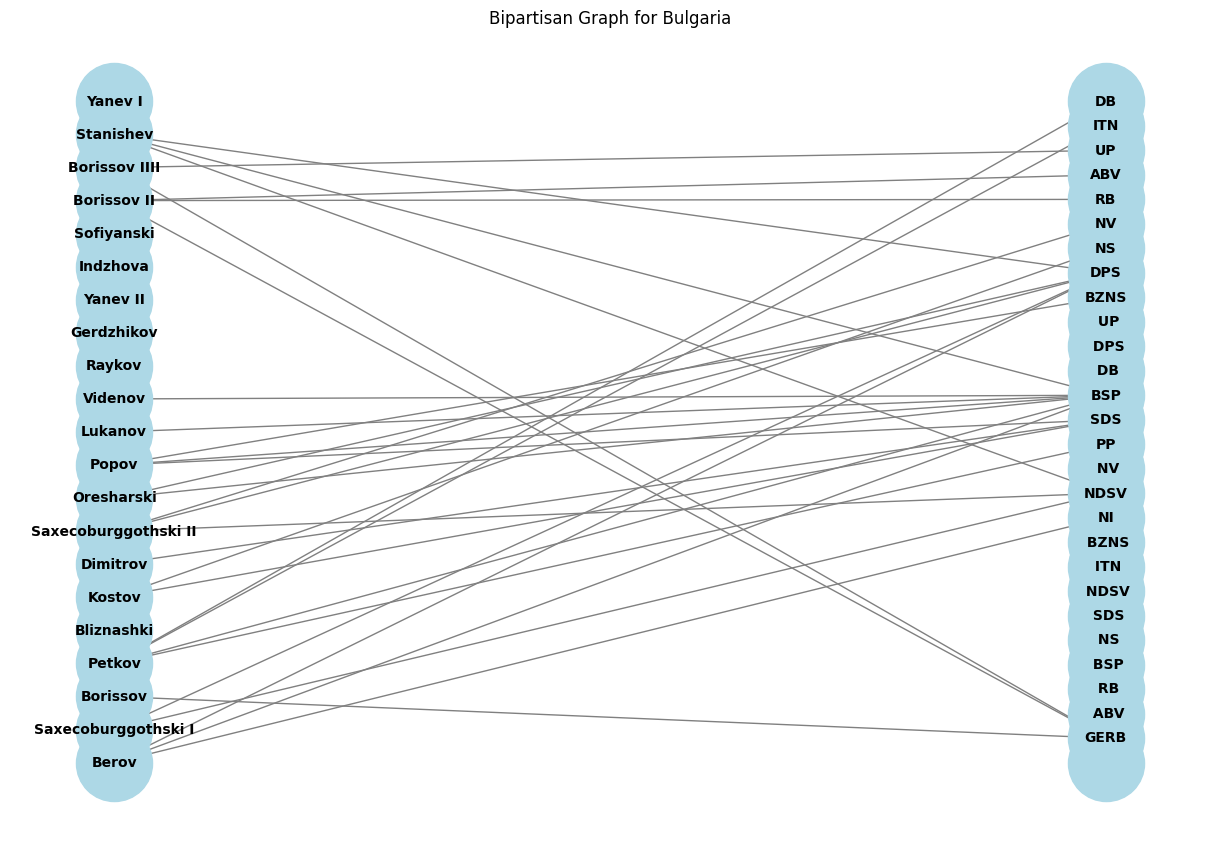

In [23]:
# Filter rows by country
country = 'Bulgaria'  # Replace with the desired country
filtered_data = df[df['country_name'] == country].copy()

# Convert 'cab_composition1' to string and handle missing values
filtered_data.loc[:, 'cab_composition1'] = filtered_data['cab_composition1'].fillna('')

# Extract coalition government names and corresponding parties
coalitions = filtered_data['cab_name'].unique()
parties = set()

for parties_list in filtered_data['cab_composition1']:
    if isinstance(parties_list, str):  # Check if the value is a string
        parties.update(parties_list.split(','))

# Create a bipartite graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite" set to 0 or 1
B.add_nodes_from(coalitions, bipartite=0) #set bipartite attribute when adding nodes
B.add_nodes_from(parties, bipartite=1) #set bipartite attribute when adding nodes

# Add edges between coalitions and their parties
for _, row in filtered_data.iterrows():
    coalition = row['cab_name']
    if isinstance(row['cab_composition1'], str):  # Check if the value is a string
        party_list = row['cab_composition1'].split(',')
        for party in party_list:
            party = party.strip()  # Remove any leading/trailing whitespace
            if party:  # Ensure the party is not an empty string
                B.add_edge(coalition, party)

# Define the bipartite sets
top_nodes = {n for n, d in B.nodes(data=True) if d.get('bipartite') == 0} # Use get method to avoid KeyError if 'bipartite' is not found.
bottom_nodes = {n for n, d in B.nodes(data=True) if d.get('bipartite') == 1} # Use get method to avoid KeyError if 'bipartite' is not found.

# Draw the graph
# Use the bipartite sets to define the layout
pos = nx.bipartite_layout(B, top_nodes)
plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title(f'Bipartisan Graph for {country}')
plt.show()

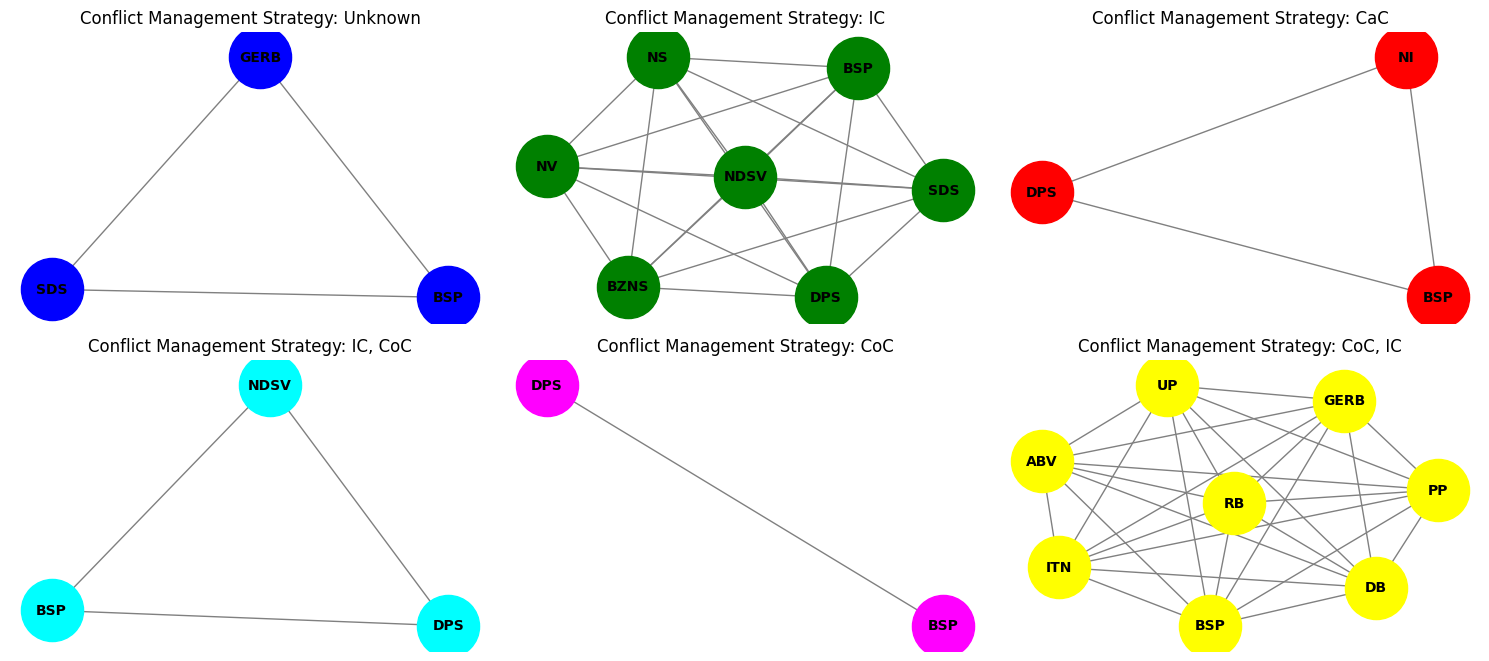

In [20]:
def draw_conflict_management_graph(country_name, df):
    # Filter data by country
    country_data = df[df['country_name'] == country_name].copy()

    # Check if data exists for the country
    if country_data.empty:
        print(f"No data found for {country_name}")
        return

    # Handle missing values in 'coal_conf_common' by filling with 'Unknown'
    country_data['coal_conf_common'] = country_data['coal_conf_common'].fillna('Unknown')

    # Extract unique conflict management strategies
    strategies = country_data['coal_conf_common'].unique()

    # Dictionary to store graphs for each strategy
    strategy_graphs = {}

    # Iterate over each strategy to create a graph for parties using that strategy
    for strategy in strategies:
        # Create a graph for each strategy
        G = nx.Graph()

        # Filter data for the current strategy
        strategy_data = country_data[country_data['coal_conf_common'] == strategy]

        # Extract the list of parties
        parties = set()
        for composition in strategy_data['cab_composition1'].dropna():
            party_list = [party.strip() for party in composition.split(',')]
            parties.update(party_list)

        # Add edges between all parties using this strategy
        for party1 in parties:
            for party2 in parties:
                if party1 != party2:
                    G.add_edge(party1, party2)

        # Add the graph to the dictionary
        strategy_graphs[strategy] = G

    # Plot each graph with different colors
    plt.figure(figsize=(15, 10))

    # Define colors for different strategies
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'purple']

    for i, (strategy, G) in enumerate(strategy_graphs.items()):
        plt.subplot(3, 3, i+1)
        # Create a layout for each graph individually
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color=colors[i % len(colors)], edge_color='gray',
                node_size=2000, font_size=10, font_weight='bold')
        plt.title(f"Conflict Management Strategy: {strategy}")

    plt.tight_layout()
    plt.show()


draw_conflict_management_graph("Bulgaria", df)

In [21]:


def plot_cabinet_duration_histogram(df, country):

    # Filter rows by the specified country
    filtered_data = df[df['country_name'] == country].copy()

    # Check if there is any data for the specified country
    if filtered_data.empty:
        print(f"No data found for {country}.")
        return

    # Extract cabinet durations
    cabinet_durations = filtered_data['cab_duration_days'].dropna()  # Drop NaN values

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(cabinet_durations, bins=10, edgecolor='black', color='lightblue', alpha=0.7)

    # Add titles and labels
    plt.title(f'Cabinet Duration Distribution for {country}', fontsize=16)
    plt.xlabel('Cabinet Duration (Days)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Display the plot
    plt.grid(True)
    plt.show()



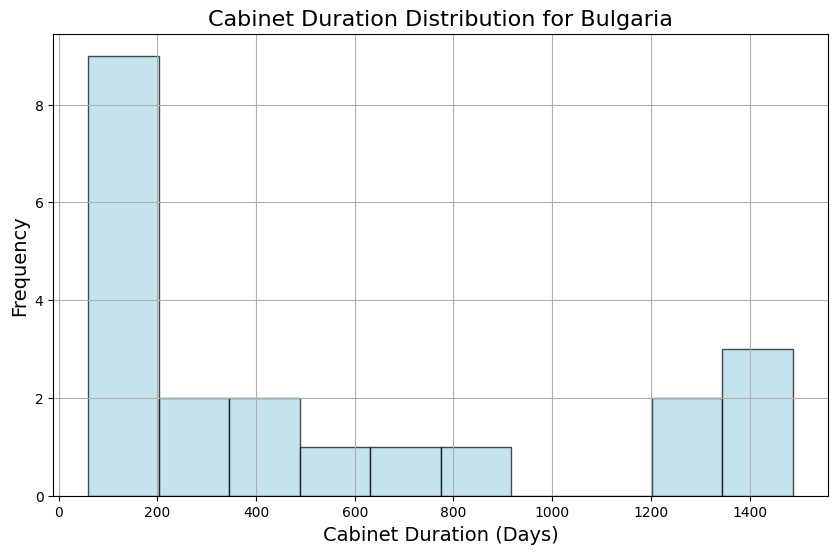

In [14]:
plot_cabinet_duration_histogram(df, 'Bulgaria')


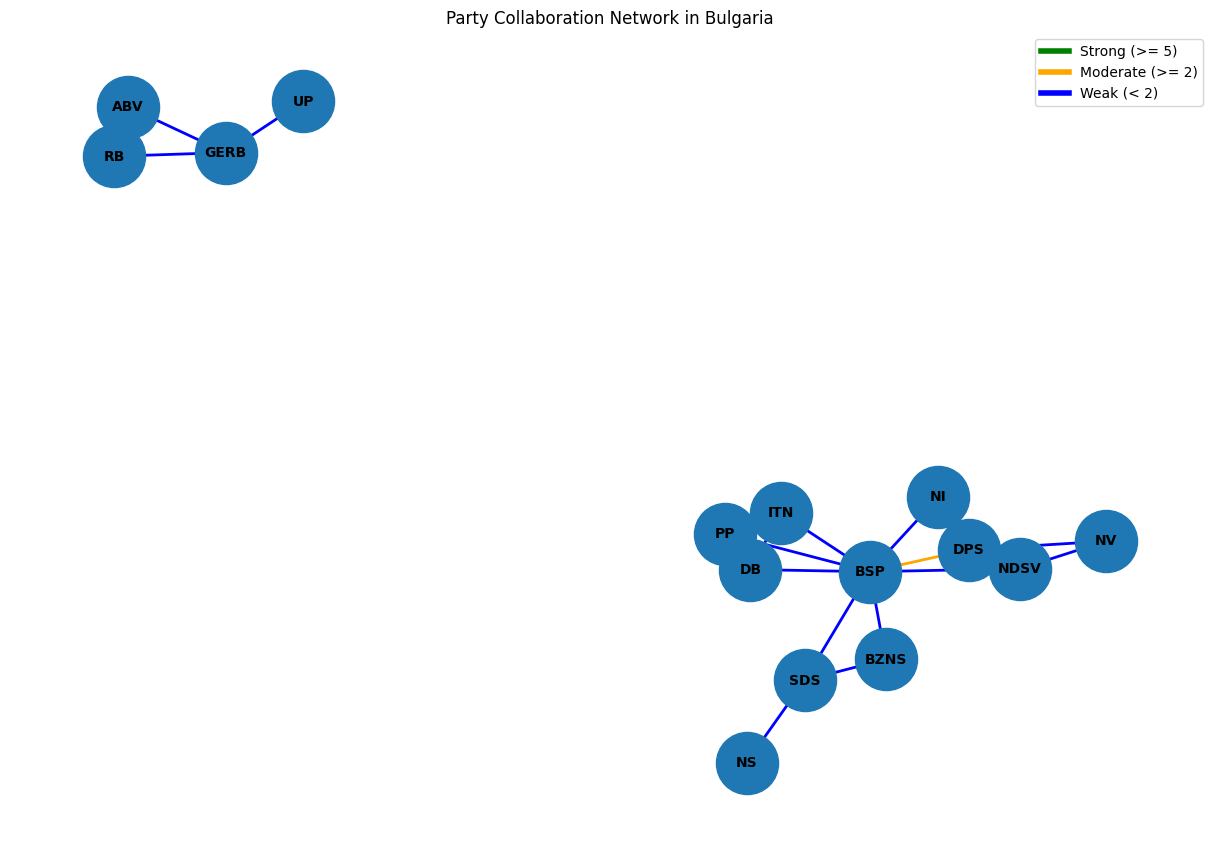

Triadic Closure count: 30
The political landscape shows high potential for new coalitions.

Highly similar parties frequently forming coalitions (Jaccard Coefficient > 0.3):
NI and NDSV: Jaccard Coefficient = 0.67
NI and BZNS: Jaccard Coefficient = 0.33
NI and NV: Jaccard Coefficient = 0.33
BZNS and NS: Jaccard Coefficient = 0.50
UP and ABV: Jaccard Coefficient = 0.50
UP and RB: Jaccard Coefficient = 0.50

Influential parties with high closeness centrality (Closeness > 0.4):
BSP, DPS


In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib.lines import Line2D

# Filter data for a specific country (e.g., Bulgaria)
country_data = df[df['country_name'] == 'Bulgaria']

# Create a graph
G = nx.Graph()

# Add nodes for each party
parties = set()
for composition in country_data['cab_composition1'].dropna():
    party_list = [party.strip() for party in composition.split(',')]
    parties.update(party_list)
G.add_nodes_from(parties)

# Add edges based on co-occurrence in governments
coalitions = {}
for _, row in country_data.iterrows():
    coalition = row['cab_name']
    if isinstance(row['cab_composition1'], str):
        party_list = row['cab_composition1'].split(',')
        party_list = [party.strip() for party in party_list]
        if coalition not in coalitions:
            coalitions[coalition] = party_list

for party_list in coalitions.values():
    for i in range(len(party_list)):
        for j in range(i + 1, len(party_list)):
            if party_list[i] != party_list[j]:
                if G.has_edge(party_list[i], party_list[j]):
                    G[party_list[i]][party_list[j]]['weight'] += 1
                else:
                    G.add_edge(party_list[i], party_list[j], weight=1)

# Edge colors based on weight (thresholds as before)
edge_colors = []
for u, v, weight in G.edges(data='weight'):
    if weight >= 5:
        edge_colors.append('green')  # Strong collaboration
    elif weight >= 2:
        edge_colors.append('orange')  # Moderate collaboration
    else:
        edge_colors.append('blue')  # Weak collaboration

# Application of Triadic Closure
triadic_closures = 0
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    for u, v in combinations(neighbors, 2):
        if not G.has_edge(u, v):
            triadic_closures += 1

# Application of Jaccard Coefficient
high_similarity_pairs = []
for u, v, jaccard_coeff in nx.jaccard_coefficient(G):
    if jaccard_coeff > 0.3:
        high_similarity_pairs.append((u, v, jaccard_coeff))

# Application of Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
influential_parties = [party for party, closeness in closeness_centrality.items() if closeness > 0.4]

# Keep graph unchanged, draw same as before
pos = nx.spring_layout(G)

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_weight='bold',
        edge_color=edge_colors, width=2)  # Using same edge colors as before

# Add legend for edge colors
legend_elements = [
    Line2D([0], [0], color='green', lw=4, label='Strong (>= 5)'),
    Line2D([0], [0], color='orange', lw=4, label='Moderate (>= 2)'),
    Line2D([0], [0], color='blue', lw=4, label='Weak (< 2)')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Party Collaboration Network in Bulgaria')
plt.show()

# Insights based on the social network measures
print(f"Triadic Closure count: {triadic_closures}")
if triadic_closures > 10:
    print(f"The political landscape shows high potential for new coalitions.")

if high_similarity_pairs:
    print("\nHighly similar parties frequently forming coalitions (Jaccard Coefficient > 0.3):")
    for u, v, score in high_similarity_pairs:
        print(f"{u} and {v}: Jaccard Coefficient = {score:.2f}")

if influential_parties:
    print("\nInfluential parties with high closeness centrality (Closeness > 0.4):")
    print(", ".join(influential_parties))


In [17]:
print("Number of minsitries in each country is listed below. The number directly indicates the effectiveness of the administration and may indicate the effectiveness of collition")

print('''
Bulgaria: 29
Czech Republic: 25
Estonia: 25
Hungary: 40
Latvia: 21
Lithuania: 27
Poland: 41
Romania: 53
Slovakia: 20
Slovenia: 15
''')

Number of minsitries in each country is listed below. The number directly indicates the effectiveness of the administration and may indicate the effectiveness of collition

Bulgaria: 29
Czech Republic: 25
Estonia: 25
Hungary: 40
Latvia: 21
Lithuania: 27
Poland: 41
Romania: 53
Slovakia: 20
Slovenia: 15



Coming together federation and holding together federation


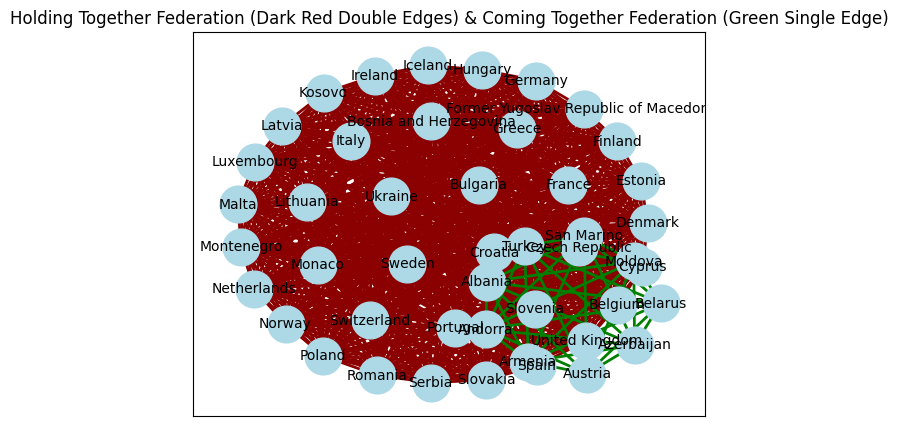

In [18]:
print("Coming together federation and holding together federation")

import networkx as nx
import matplotlib.pyplot as plt

# List of countries in Holding Together Federation
holding_together = [
    'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Former Yugoslav Republic of Macedonia',
    'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia',
    'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
    'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
    'United Kingdom'
]

# List of countries in Coming Together Federation
coming_together = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
    'Moldova', 'San Marino', 'Turkey'
]

# Initialize the graph
G = nx.Graph()

# Add nodes (countries) to the graph
G.add_nodes_from(holding_together + coming_together)

# Add edges for Holding Together Federation (dark red, 2 edges between countries)
for i, country1 in enumerate(holding_together):
    for country2 in holding_together[i+1:]:
        G.add_edge(country1, country2, weight=2, color='darkred')

# Add edges for Coming Together Federation (single green edge between countries)
for i, country1 in enumerate(coming_together):
    for country2 in coming_together[i+1:]:
        G.add_edge(country1, country2, weight=1, color='green')

# Position the nodes using a Kamada-Kawai layout for better separation
pos = nx.kamada_kawai_layout(G)

# Increase node size and adjust edge width for better visibility
node_size = 700
edge_width = 2

# Draw the nodes with a light blue color
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='lightblue')

# Draw the edges with proper colors and weights
edges = G.edges(data=True)
edge_colors = [edge[2]['color'] for edge in edges]
edge_weights = [edge[2]['weight'] for edge in edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_width)

# Draw the labels with a larger font size for better readability
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Set the title of the graph
plt.title("Holding Together Federation (Dark Red Double Edges) & Coming Together Federation (Green Single Edge)")

# Adjust plot margins to provide more space around the graph
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Display the graph
plt.show()